LENDING CLUB is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

### Data Overview




<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

In [3]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [4]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [5]:
feat_info('mort_acc')

Number of mortgage accounts.



## Loading the data and other imports

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [7]:

df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  



# Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**




**TASK: Since we will be attempting to predict loan_status, creating a countplot as shown below.**

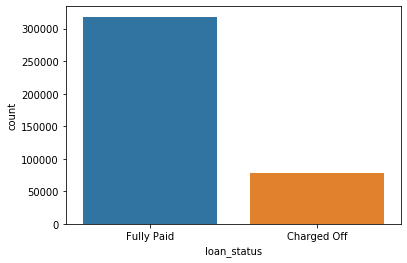

In [9]:
sns.countplot(x='loan_status',data=df)

**Creating a histogram of the loan_amnt column.**

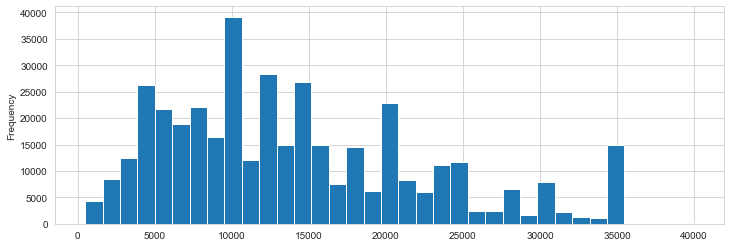

In [10]:
sns.set_style('whitegrid')
fig=plt.figure(figsize=(12,4))
df['loan_amnt'].plot.hist(bins=35)
fig=plt.set_xlabel='loan_amt'

**Exploring correlation between the continuous feature variables. Calculating the correlation between all continuous numeric variables using .corr() method.**

In [11]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Visualizing this using a heatmap.**

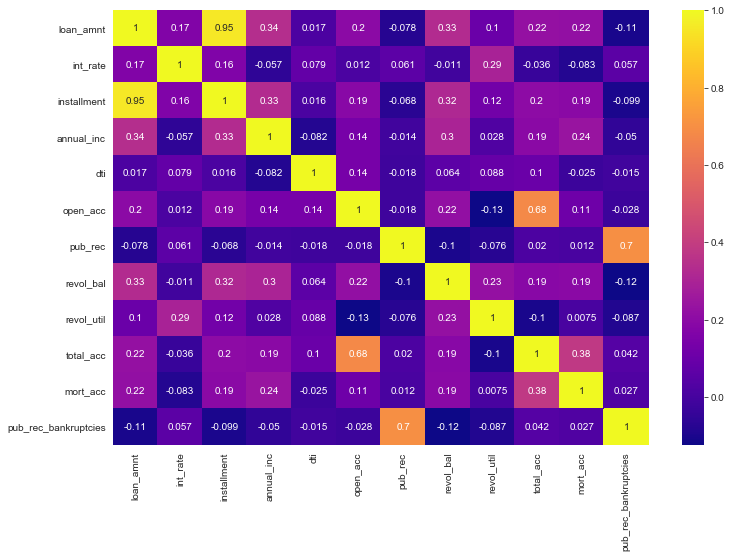

In [12]:
fig=plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),robust=True,annot=True,cmap='plasma')

**We notice an almost perfect correlation with the "installment" feature. Exploring this feature further. Printing out their descriptions and performing a scatterplot between them.**

The monthly payment owed by the borrower if the loan originates.

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.



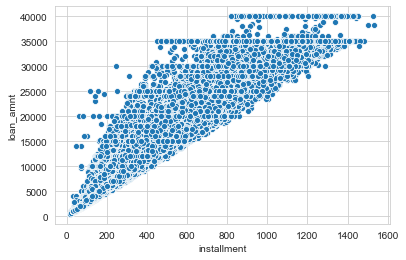

In [13]:
feat_info('installment')
print()
feat_info('loan_amnt')
print()
sns.scatterplot(x='installment',y='loan_amnt',data=df)

**Creating a boxplot showing the relationship between the loan_status and the Loan Amount.**

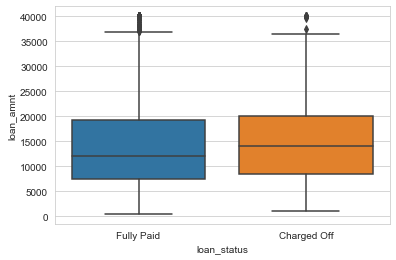

In [14]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

**Calculating the summary statistics for the loan amount, grouped by the loan_status.**

In [15]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Exploring the Grade and SubGrade columns that LendingClub attributes to the loans.**

In [16]:
g=df['grade'].sort_values()

In [17]:
s=df['sub_grade'].sort_values()

**Creating a countplot per grade. Setting the hue to the loan_status label.**

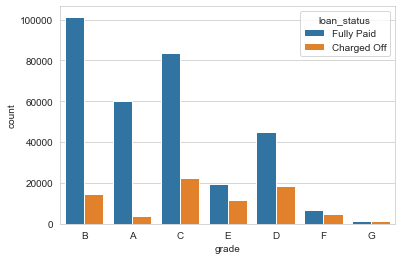

In [18]:
sns.countplot(x='grade',hue='loan_status',data=df)

**Displaying a count plot per subgrade.**

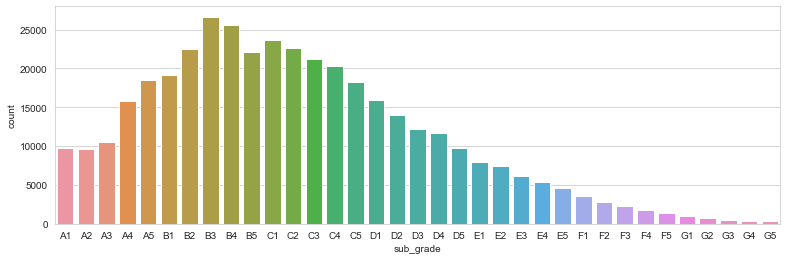

In [19]:
fig=plt.figure(figsize=(13,4))
sns.countplot(x=s,data=df)

In [20]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


**Differentiating between the fully loan paid and the ones who did not pay on the basis of subgrade assigned.**

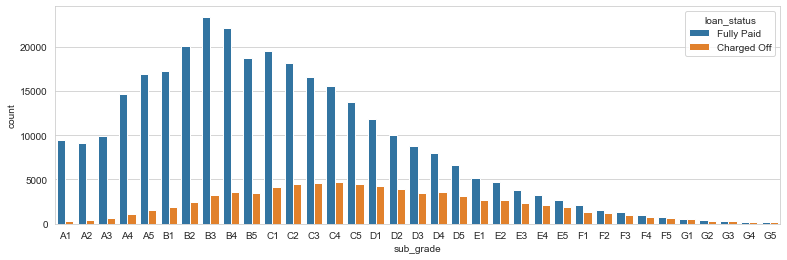

In [21]:
fig=plt.figure(figsize=(13,4))
sns.countplot(x=s,data=df,hue='loan_status')

**Looking just at the F and G grade people, as they are very less**

In [22]:
dff=df[(df['sub_grade']=='F1')|(df['sub_grade']=='F2')|(df['sub_grade']=='F3')|(df['sub_grade']=='F4')|(df['sub_grade']=='F5')|(df['sub_grade']=='G1')|(df['sub_grade']=='G2')|(df['sub_grade']=='G3')|(df['sub_grade']=='G4')|(df['sub_grade']=='G5')]

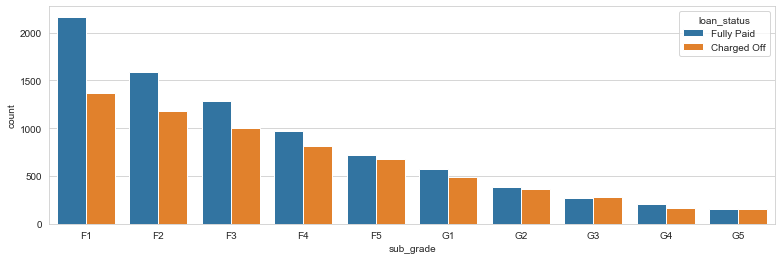

In [23]:
fig=plt.figure(figsize=(13,4))
r=dff['sub_grade'].sort_values()
sns.countplot(x=r,data=dff,hue='loan_status')

**Creating a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [24]:
def convert_to_num(col_name):
    if col_name=='Fully Paid':
        return 1
    else:
        return 0
df['loan_repaid']=df['loan_status'].apply(convert_to_num)

In [25]:
df['loan_repaid'].unique()

array([1, 0])

In [26]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Creating a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

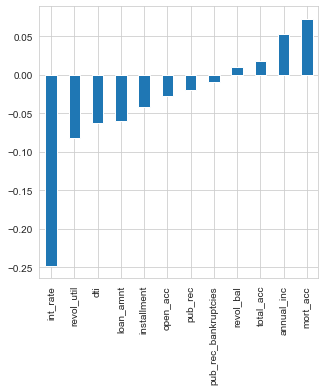

In [27]:
sns.set_style('whitegrid')
fig=plt.figure(figsize=(5,5))
a=df.corr()['loan_repaid'].sort_values().drop('loan_repaid')
a.plot(kind='bar')

**Looks like interest rate is very negatively correlated with loan repaid.**

---
---
**Data PreProcessing**

**Removing or filling any missing data. Removing unnecessary or repetitive features. Converting categorical string features to dummy variables.**



In [28]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


# Missing Data

**Exploring the missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

In [29]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


**Creating a Series that displays the total count of missing values per column.**

In [30]:
s=df.isnull().sum()
s=(s*100)/396030

**Converting this Series to be in term of percentage of the total DataFrame for examining percentage of null values**

In [31]:
s

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Examining emp_title and emp_length to see whether it will be okay to drop them. Printing out their feature information using the feat_info() function from the top of this notebook.**

In [32]:
feat_info('emp_title')
print()
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**Let's see how many unique employment job titles are there.**

In [33]:
df['emp_title'].nunique()

173105

In [34]:
df['emp_title'].value_counts()

Teacher                                     4389
Manager                                     4250
Registered Nurse                            1856
RN                                          1846
Supervisor                                  1830
                                            ... 
Largo Medical Center-Indian Rocks Campus       1
inspector packer 2                             1
Matrix Medical Network                         1
Assistant Director, University Events          1
FMC Technologies Inc.                          1
Name: emp_title, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [35]:
df=df.drop('emp_title',axis=1)

**Creating a count plot of the emp_length feature column.**

In [36]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [37]:
def convert_to_value(col_name):
    if col_name=='< 1 year':
        return 0
    if col_name=='1 year':
        return 1
    if col_name=='2 years':
        return 2
    if col_name=='3 years':
        return 3
    if col_name=='4 years':
        return 4
    if col_name=='5 years':
        return 5
    if col_name=='6 years':
        return 6
    if col_name=='7 years':
        return 7
    if col_name=='8 years':
        return 8
    if col_name=='9 years':
        return 9
    if col_name=='10+ years':
        return 10
    

In [38]:
df['emp_length_values']=df['emp_length'].apply(convert_to_value)

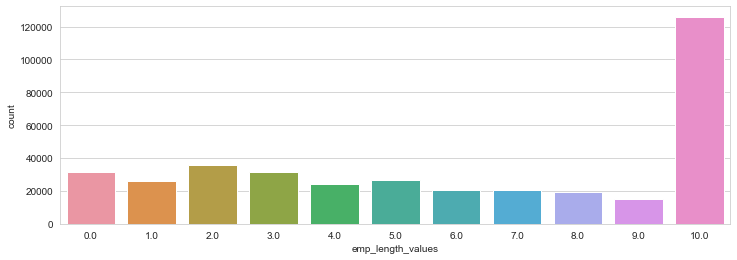

In [39]:
fig=plt.figure(figsize=(12,4))
sns.countplot(x='emp_length_values',data=df)

**Plotting out the countplot with a hue separating Fully Paid vs Charged Off**

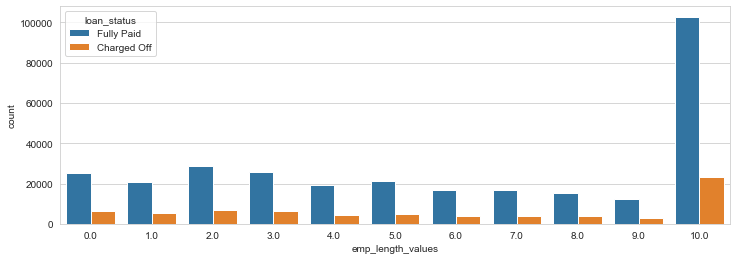

In [40]:
fig=plt.figure(figsize=(12,4))
sns.countplot(x='emp_length_values',data=df,hue='loan_status')

In [41]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid,emp_length_values
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1,10.0
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1,4.0
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1,0.0
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,6.0
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1,2.0
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1,5.0
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1,10.0
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1,10.0


**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [42]:
l=[ ]
for i in range(11):
    a=(df[(df['emp_length_values']==i) & (df['loan_repaid']==0)]['loan_repaid'].value_counts()/(sum(df['emp_length_values']==i)))*100
    l.append(a)

In [43]:
ar=np.array(l)

In [44]:
b=[ ]
for i in range(11):
    b.append(ar[i][0])

In [45]:
c=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

In [46]:
dff=pd.DataFrame(data={'Emp_length_category':c,'Percentage_not_paid':b})

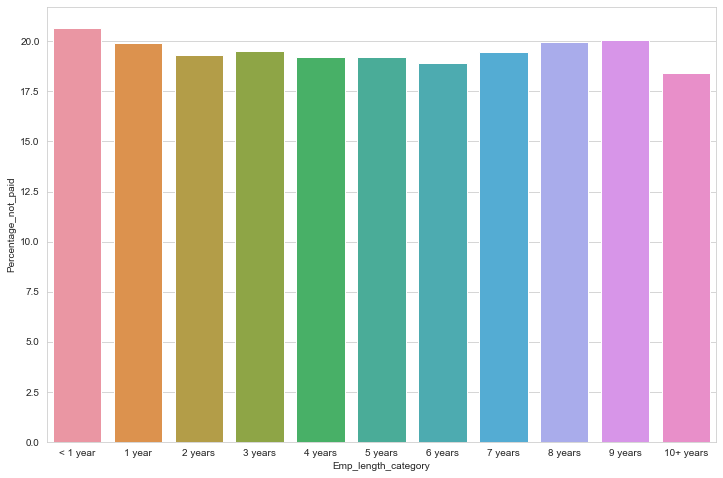

In [47]:
fig=plt.figure(figsize=(12,8))
sns.barplot(x='Emp_length_category',y='Percentage_not_paid',data=dff)

**Charge off rates are extremely similar across all employment lengths. Dropping the emp_length column.**

In [48]:
df=df.drop(['emp_length','emp_length_values'],axis=1)

In [49]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


**Revisiting the DataFrame to see what feature columns still have missing data.**

In [50]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Reviewing the title column vs the purpose column.**

In [51]:
df[['title','purpose']]

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
...,...,...
396025,Debt consolidation,debt_consolidation
396026,Debt consolidation,debt_consolidation
396027,pay off credit cards,debt_consolidation
396028,Loanforpayoff,debt_consolidation


In [52]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column. Dropping the title column.**

In [53]:
df=df.drop(['title'],axis=1)

In [54]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


--


---
**Finding out what the mort_acc feature represents**

In [55]:
feat_info('mort_acc')

Number of mortgage accounts.


**Creating a value_counts of the mort_acc column.**

In [56]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**There are many ways we could deal with this missing data. Let's review the other columsn to see which feature most highly correlates to mort_acc**

In [57]:
df.corr()['mort_acc'].sort_values(ascending=False)

mort_acc                1.000000
total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [58]:
s=df.groupby('total_acc')['mort_acc'].mean()
s

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns.**

In [59]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [60]:
for i in range(396030):
    if pd.isnull(df.iloc[i,21]):
        df.iloc[i,21]=s[df.iloc[i,18]]

In [61]:
sum(df['mort_acc'].isnull())

0

In [62]:
df[['total_acc','mort_acc']]

,total_acc,mort_acc
0,25.0,0.000000
1,27.0,3.000000
2,26.0,0.000000
3,13.0,0.000000
4,43.0,1.000000
...,...,...
396025,23.0,0.000000
396026,8.0,1.000000
396027,23.0,0.000000
396028,20.0,5.000000


In [63]:
s[19]

1.3580128970623357

In [64]:
df.iloc[396029,21]

1.3580128970623357

In [65]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [66]:
(df.isnull().sum()['revol_util']*100)/396030

0.06969169002348306

In [67]:
(df.isnull().sum()['pub_rec_bankruptcies']*100)/396030

0.13509077595131683

**Revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Dropping the rows that are missing those values in those columns with dropna().**

In [68]:
df.dropna(inplace=True)

In [69]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**Now we just need to deal with the string values due to the categorical columns.**

**Listing all the columns that are currently non-numeric. 

In [70]:
g = df.columns.to_series().groupby(df.dtypes).groups
g

{dtype('int64'): Index(['loan_repaid'], dtype='object'),
 dtype('float64'): Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
        'pub_rec_bankruptcies'],
       dtype='object'),
 dtype('O'): Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
        'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
        'initial_list_status', 'application_type', 'address'],
       dtype='object')}

In [71]:
{k.name: v for k, v in g.items()}

{'int64': Index(['loan_repaid'], dtype='object'),
 'float64': Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
        'pub_rec_bankruptcies'],
       dtype='object'),
 'object': Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
        'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
        'initial_list_status', 'application_type', 'address'],
       dtype='object')}

---
**Going through all the string features to see what we should do with them.**

---


### term feature

**Converting the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [72]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [73]:
c=0
ar=df['term'].values
for i in range(395219):
    if ar[i]==' 36 months':
        ar[i]=36
    if ar[i]==' 60 months':
        ar[i]=60           

In [74]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


### grade feature

**We already know grade is part of sub_grade, so dropping the grade feature.**

In [75]:
df.drop('grade',axis=1,inplace=True)

**Converting the subgrade into dummy variables. Then concatenating these new columns to the original dataframe.**

In [76]:
subgrade=pd.get_dummies(df['sub_grade'],drop_first=True)

In [77]:
subgrade

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396026,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396027,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df=pd.concat([df,subgrade],axis=1)

In [79]:
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,Fully Paid,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,...,0,0,0,0,0,0,0,0,0,0


In [80]:
df.drop('sub_grade',axis=1,inplace=True)

### verification_status, application_type,initial_list_status,purpose 
**Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenating them with the original dataframe.**

In [81]:
verificationstatus=pd.get_dummies(df['verification_status'],drop_first=True)
applicationtype=pd.get_dummies(df['application_type'],drop_first=True)
initialliststatus=pd.get_dummies(df['initial_list_status'],drop_first=True)
Purpose=pd.get_dummies(df['purpose'],drop_first=True)

In [82]:
df=pd.concat([df,verificationstatus,applicationtype,initialliststatus,Purpose],axis=1)

In [83]:
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1,inplace=True)

### home_ownership
**Reviewing the value_counts for the home_ownership column.**

In [85]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Converting these to dummy variables, but replacing NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenating them with the original dataframe.**

In [86]:
for i in range(395219):
    if (df.iloc[i,4]=='NONE')|(df.iloc[i,4]=='ANY'):
        df.iloc[i,4]='OTHER'

In [87]:
homeownership=pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df,homeownership],axis=1)

In [88]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

### address
**Feature engineering a zip code column from the address in the data set. Creating a column called 'zip_code' that extracts the zip code from the address column.**

In [89]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [90]:
def fun(col_name):
    return col_name[len(col_name)-5:]
df['zip_code']=df['address'].apply(fun)

In [91]:
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,moving,other,renewable_energy,small_business,vacation,wedding,OTHER,OWN,RENT,zip_code
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,0,0,0,0,1,0,0,0,1,22690
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,0,0,0,0,0,0,0,0,05113
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,0,0,0,0,0,0,0,0,1,05113
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,0,0,0,0,0,0,0,0,1,00813
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,0,0,0,0,0,0,0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,0,0,0,0,0,0,0,0,1,30723
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,0,0,0,0,0,0,0,0,05113
396027,5000.0,36,9.99,161.32,RENT,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,0,0,0,0,0,0,0,0,1,70466
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,0,0,0,0,0,29597


**Now making this zip_code column into dummy variables using pandas. Concatenating the result and dropping the original zip_code column along with dropping the address column.**

In [92]:
zipcode=pd.get_dummies(df['zip_code'],drop_first=True)

In [93]:
df=pd.concat([df,zipcode],axis=1)

In [94]:
df.drop('zip_code',axis=1,inplace=True)

In [95]:
df

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,...,1,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,...,1,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Oct-2015,Fully Paid,15.63,Nov-2004,...,1,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Feb-2015,Fully Paid,21.45,Feb-2006,...,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Oct-2013,Fully Paid,17.56,Mar-1997,...,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Aug-2012,Fully Paid,15.88,Nov-1990,...,0,0,0,0,1,0,0,0,0,0


In [96]:
df.drop('address',axis=1,inplace=True)

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, dropping this feature.**

In [98]:
df.drop('issue_d',axis=1,inplace=True)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extracting the year from this feature using a .apply function, then converting it to a numeric feature. Setting this new data to a feature column called 'earliest_cr_year'.Then dropping the earliest_cr_line feature.**

In [99]:
def f1(col_name):
    return col_name[len(col_name)-4:]

In [100]:
def f2(col_name):
    col_name= int(col_name)
    return col_name

In [101]:
df['term']=df['term'].apply(f2)

In [102]:
df['earliest_cr_year']=df['earliest_cr_line'].apply(f1)

In [103]:
df['earliest_cr_year']=df['earliest_cr_year'].apply(f2)

In [104]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [105]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'Source Verified', 'Verified', 'INDIVIDUAL', 'JOINT', 'w',
       'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
       'house', 'major_purchase', 'medical', 'moving', 'other',
       'renewable_energy', 'small_business', 'vacation', 'wedding', 'OTHER',
       'OWN', 'RENT', '05113', '11650', '22690', '29597', '30723', '48052',
       '70466', '86630', '93700', 'earliest_cr_year'],
      dtype='object')

In [106]:
df.drop('home_ownership',axis=1,inplace=True)

In [107]:
df

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,Fully Paid,15.63,6.0,0.0,1990.0,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,110000.0,Fully Paid,21.45,6.0,0.0,43263.0,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,56500.0,Fully Paid,17.56,15.0,0.0,32704.0,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,64000.0,Fully Paid,15.88,9.0,0.0,15704.0,...,0,0,0,1,0,0,0,0,0,1990


In [108]:
g = df.columns.to_series().groupby(df.dtypes).groups
{k.name: v for k, v in g.items()}

{'uint8': Index(['A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
        'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
        'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
        'Source Verified', 'Verified', 'INDIVIDUAL', 'JOINT', 'w',
        'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
        'house', 'major_purchase', 'medical', 'moving', 'other',
        'renewable_energy', 'small_business', 'vacation', 'wedding', 'OTHER',
        'OWN', 'RENT', '05113', '11650', '22690', '29597', '30723', '48052',
        '70466', '86630', '93700'],
       dtype='object'),
 'int64': Index(['term', 'loan_repaid', 'earliest_cr_year'], dtype='object'),
 'float64': Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
        'pub_rec_bankruptcies'],
       dtype='object'),
 'object': Index(['loan_status'], dtyp

## Train Test Split

**Importing train_test_split from sklearn.**

In [109]:
from sklearn.model_selection import train_test_split

**Dropping the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [110]:
df.drop('loan_status',axis=1,inplace=True)

In [111]:
g = df.columns.to_series().groupby(df.dtypes).groups
{k.name: v for k, v in g.items()}

{'uint8': Index(['A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3',
        'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5',
        'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
        'Source Verified', 'Verified', 'INDIVIDUAL', 'JOINT', 'w',
        'credit_card', 'debt_consolidation', 'educational', 'home_improvement',
        'house', 'major_purchase', 'medical', 'moving', 'other',
        'renewable_energy', 'small_business', 'vacation', 'wedding', 'OTHER',
        'OWN', 'RENT', '05113', '11650', '22690', '29597', '30723', '48052',
        '70466', '86630', '93700'],
       dtype='object'),
 'int64': Index(['term', 'loan_repaid', 'earliest_cr_year'], dtype='object'),
 'float64': Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
        'pub_rec_bankruptcies'],
       dtype='object')}

**Setting X and y variables to the .values of the features and label.**

In [116]:
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

**Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**Using a MinMaxScaler to normalize the feature data X_train and X_test as we don't want data leakge from the test set so we only fit on the X_train data.**

In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
scaler = MinMaxScaler()

In [121]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [122]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Creating the Model

**Running the cell below to import the necessary Keras functions.**

In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Building a sequential model to be trained on the data, along with dropout layers.**

In [148]:
# CODE HERE
model = Sequential()
model.add(Dense(units=78,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')                    

In [149]:
from tensorflow.keras.callbacks import EarlyStopping

In [150]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

**Fitting the model to the training data 200 epochs. Also adding in the validation data for later plotting, along with batch size of 256.**

In [151]:
model.fit(x=X_train,y=y_train,epochs=200,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stop],batch_size=256)

Epoch 1/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.3141 - val_loss: 0.2663
Epoch 2/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2691 - val_loss: 0.2636
Epoch 3/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2652 - val_loss: 0.2631
Epoch 4/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2638 - val_loss: 0.2627
Epoch 5/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2632 - val_loss: 0.2627
Epoch 6/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2626 - val_loss: 0.2622
Epoch 7/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2620 - val_loss: 0.2622
Epoch 8/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2620 - val_loss: 0.2620
Epoch 9/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2617 - val_loss: 0.2621
Epoch 10/200
1236/1236 [==============================] - 3s 3ms/step - l

Epoch 80/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2570 - val_loss: 0.2600
Epoch 81/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2568 - val_loss: 0.2600
Epoch 82/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2570 - val_loss: 0.2595
Epoch 83/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2569 - val_loss: 0.2600
Epoch 84/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2565 - val_loss: 0.2601
Epoch 85/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2568 - val_loss: 0.2600
Epoch 86/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2568 - val_loss: 0.2606
Epoch 87/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2564 - val_loss: 0.2599
Epoch 88/200
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2566 - val_loss: 0.2598
Epoch 89/200
1236/1236 [==============================] - 3s 3ms

**Evaluating Model Performance.**

**Plotting out the validation loss versus the training loss.**

In [152]:
model_loss=pd.DataFrame(model.history.history)

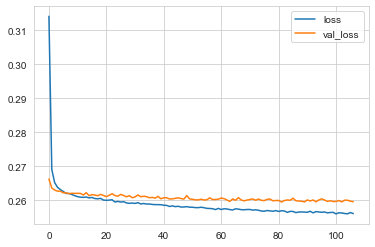

In [153]:
model_loss.plot()

**Creating predictions from the X_test set and displaying a classification report and confusion matrix for the X_test set.**

In [156]:
predictions=model.predict_classes(X_test)

In [160]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [158]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [159]:
print(confusion_matrix(y_test,predictions))

[[ 6887  8771]
 [  108 63278]]


In [163]:
print(accuracy_score(y_test,predictions)*100)

88.76701583927938


**Checking for a random customer, whether to offer loan or not.**

In [172]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [173]:
new_customer = scaler.transform(new_customer.values.reshape(-1, 78))

In [174]:
model.predict_classes(new_customer)

array([[1]], dtype=int32)

**Now checking, whether this person actually ended up paying back their loan or not.**

In [179]:
print(random_ind)

304691


In [181]:
df.iloc[304691]['loan_repaid']

1.0

**Model predicted correctly**